In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.datasets import mnist
from sklearn import preprocessing
from keras.utils import to_categorical

### Downloading data

In [2]:
# Load MNIST handwritten digit data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print shapes of training and testing data
print(X_train.shape)
print(X_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


### Sample image from the dataset

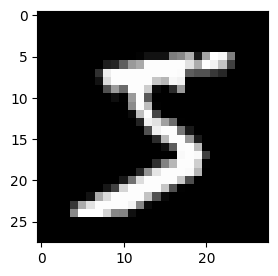

In [16]:
img = X_train[0].reshape(28,28)

plt.figure(figsize = (3,3))
plt.imshow(img, cmap="gray")

### One-hot encoding data

In [4]:
# For train image Labels
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)

# For test image Labels
temp = []
for i in range(len(y_test)):
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [5]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


### Neural network

In [6]:
# Create simple Neural Network model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(144, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 144)               14544     
                                                                 
 dense_2 (Dense)             (None, 10)                1450      
                                                                 
Total params: 94494 (369.12 KB)
Trainable params: 94494 (369.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [10]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.5559 - acc: 0.8485 - val_loss: 0.3543 - val_acc: 0.8960
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3707 - acc: 0.8874 - val_loss: 0.3398 - val_acc: 0.9011
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3252 - acc: 0.9017 - val_loss: 0.3003 - val_acc: 0.9072
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2978 - acc: 0.9087 - val_loss: 0.2793 - val_acc: 0.9156
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2932 - acc: 0.9085 - val_loss: 0.2960 - val_acc: 0.9085
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2779 - acc: 0.9148 - val_loss: 0.2540 - val_acc: 0.9231
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2561 - acc: 0.9213 - val_loss: 0.2510 - val_acc: 0.9215
Epoch 8/10
1875/1875 [==============================] - 7s 4m

In [12]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


### Evaluation

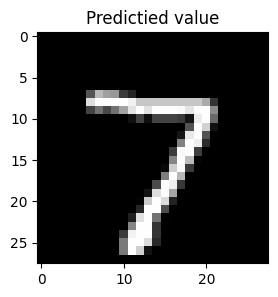


Probabiliy of each class: 
[7.7950739e-07 4.5803795e-06 3.0565192e-05 2.8642247e-04 2.5450777e-06
 1.1232189e-04 2.3351034e-09 9.9753511e-01 1.7322584e-06 2.0257768e-03]

Actual value: 
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [20]:
img = X_test[0].reshape(28,28)

plt.figure(figsize = (3,3))
plt.title('Predictied value')
plt.imshow(img, cmap="gray")
plt.show()

print(f'\nProbabiliy of each class: \n{predictions[0]}')

print(f'\nActual value: \n{y_test[0]}')

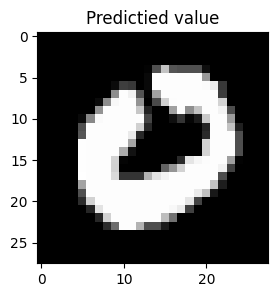


Probabiliy of each class: 
[9.6046841e-01 1.4872478e-06 8.5388601e-04 3.7249658e-05 2.9390370e-03
 8.3399640e-04 3.1477667e-02 5.4231386e-05 1.7491411e-03 1.5849187e-03]

Actual value: 
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [21]:
idx = 25

img = X_test[idx].reshape(28,28)

plt.figure(figsize = (3,3))
plt.title('Predictied value')
plt.imshow(img, cmap="gray")
plt.show()

print(f'\nProbabiliy of each class: \n{predictions[idx]}')

print(f'\nActual value: \n{y_test[idx]}')